# Importing Library

In [1]:
#Import Library
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import string
import spacy
import re

### Text Analysis (1 url)

Scrap Data

In [2]:
url="""https://insights.blackcoffer.com/will-machine-replace-the-human-in-the-future-of-work/"""

In [3]:
headers = {"User-Agent": "google chrome"}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

We need to pass argument called Headers by passing "User-Agent" to the request to bypass the mod-security error.

In [4]:
soup=BeautifulSoup(page.content, 'html.parser')

### Extract Title from articel

In [5]:
title=soup.find('h1',class_="entry-title")
title=title.text.replace('\n'," ")
title

'Will Machine Replace The Human in the Future of Work?'

### Extract Content from articel

In [6]:
content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content

' “Anything that could give rise to smarter-than-human intelligence – in the form of Artificial Intelligence, brain-computer interfaces, or neuroscience-based human intelligence enhancement – wins hands down beyond contest as doing the most to change the world. Nothing else is even in the same league.”\xa0 –Eliezer Yudkowsky, AI Researcher There’s no denying robots and automation are increasingly part of our daily lives. Just look around the grocery store, or the highway, they are everywhere. This makes us wonder what if AI can replace human intelligence? What can we do to make ourselves relevant tomorrow? Let us try to find the answers to all these questions and more. Let’s first understand what is Artificial Intelligence – Artificial Intelligence or AI basically machines displaying intelligence. This can be seen from a machine playing chess or a robot answering questions on Facebook. Artificial Intelligence can be further broken down into many different types. There are AIs designed 

### Remove punctuation from the content

In [7]:
#Punctuation
content = content.translate(str.maketrans('', '', string.punctuation)) 
content

' “Anything that could give rise to smarterthanhuman intelligence – in the form of Artificial Intelligence braincomputer interfaces or neurosciencebased human intelligence enhancement – wins hands down beyond contest as doing the most to change the world Nothing else is even in the same league”\xa0 –Eliezer Yudkowsky AI Researcher There’s no denying robots and automation are increasingly part of our daily lives Just look around the grocery store or the highway they are everywhere This makes us wonder what if AI can replace human intelligence What can we do to make ourselves relevant tomorrow Let us try to find the answers to all these questions and more Let’s first understand what is Artificial Intelligence – Artificial Intelligence or AI basically machines displaying intelligence This can be seen from a machine playing chess or a robot answering questions on Facebook Artificial Intelligence can be further broken down into many different types There are AIs designed to do specific task

### convert into Tokens

In [8]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)
print(text_tokens[0:50])

['“', 'Anything', 'that', 'could', 'give', 'rise', 'to', 'smarterthanhuman', 'intelligence', '–', 'in', 'the', 'form', 'of', 'Artificial', 'Intelligence', 'braincomputer', 'interfaces', 'or', 'neurosciencebased', 'human', 'intelligence', 'enhancement', '–', 'wins', 'hands', 'down', 'beyond', 'contest', 'as', 'doing', 'the', 'most', 'to', 'change', 'the', 'world', 'Nothing', 'else', 'is', 'even', 'in', 'the', 'same', 'league', '”', '–Eliezer', 'Yudkowsky', 'AI', 'Researcher']


### lenghts of tokens before removing stopwords

In [9]:
len(text_tokens)

1665

### Remove stopwords from the tokens

In [10]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['“', 'Anything', 'could', 'give', 'rise', 'smarterthanhuman', 'intelligence', '–', 'form', 'Artificial', 'Intelligence', 'braincomputer', 'interfaces', 'neurosciencebased', 'human', 'intelligence', 'enhancement', '–', 'wins', 'hands', 'beyond', 'contest', 'change', 'world', 'Nothing', 'else', 'even', 'league', '”', '–Eliezer', 'Yudkowsky', 'AI', 'Researcher', 'There', '’', 'denying', 'robots', 'automation', 'increasingly', 'part']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HARSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### lenghts of tokens after removing stopwords

In [11]:
len(no_stop_tokens)

990

### Check for positive words

In [12]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[5:]

Download the positive words dictionary and store in local system to speed up the process

In [13]:
pos_count = " ".join ([w for w in no_stop_tokens if w in poswords])
pos_count=pos_count.split(" ")

### Positive Score

In [14]:
#Positive Score
Positive_score=len(pos_count)
print(Positive_score)

72


### Check for negative words

In [15]:
with open("negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    
negwords = negwords[36:]

In [16]:
neg_count = " ".join ([w for w in no_stop_tokens if w in negwords])
neg_count=neg_count.split(" ")

### Negative score

In [17]:
Negative_score=len(neg_count)
print(Negative_score)

25


In [18]:
filter_content = ' '.join(no_stop_tokens)

In [19]:
data=[[url,title,content,filter_content,Positive_score,Negative_score]]

In [20]:
data=pd.DataFrame(data,columns=["url","title","content","filter_content","Positive_Score","Negative_Score"])

### calculate Polarity Score & Subjectivity Score

In [22]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

# Adding Subjectivity & Polarity
data[["polarity", "subjectivity"]] = data.apply(sentiment_analysis, axis=1)

data

,url,title,content,filter_content,Positive_Score,Negative_Score,polarity,subjectivity
0,https://insights.blackcoffer.com/will-machine-...,Will Machine Replace The Human in the Future o...,“Anything that could give rise to smarterthan...,“ Anything could give rise smarterthanhuman in...,72,25,0.141419,0.487387


### Average sentence length

In [23]:
#AVG SENTENCE LENGTH
AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))
print('Word average =', AVG_SENTENCE_LENGTH)

Word average = 8061.0


In [25]:
import textstat

Textstat is an easy to use library to calculate statistics from text. It helps determine readability, complexity, and grade level.

### FOG INDEX

In [26]:
FOG_INDEX=(textstat.gunning_fog(content))
print(FOG_INDEX)

660.88


### AVG NUMBER OF WORDS PER SENTENCE

In [27]:
AVG_NUMBER_OF_WORDS_PER_SENTENCE = [len(l.split()) for l in re.split(r'[?!.]', content) if l.strip()]
AVG_NUMBER_OF_WORDS_PER_SENTENCE=print(sum(AVG_NUMBER_OF_WORDS_PER_SENTENCE)/len(AVG_NUMBER_OF_WORDS_PER_SENTENCE))

1650.0


### COMPLEX WORD COUNT

In [28]:
def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)
print(COMPLEX_WORDS)

2877


### Word Count

In [29]:
Word_Count=len(content)
print(Word_Count)

9715


### Percentage of Complex words

In [30]:
pcw=(COMPLEX_WORDS/Word_Count)*100
print(pcw)

29.613998970663925


### Personal Pronouns

In [31]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HARSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'PRP': # If the word is a proper noun
                count = count + 1 
        
    return(count)         
                


# Calling the ProperNounExtractor function to extract all the proper nouns from the given text. 
Personal_Pronouns=ProperNounExtractor(content)  

### Average Word Length

In [33]:
Average_Word_Length=len(content.replace(' ',''))/len(content.split())
print(Average_Word_Length)

4.885454545454546


### SYLLABLE PER WORD

In [34]:
word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1
print("The AVG number of syllables in the word is: ")
print(syllable_count/len(content.split()))

The AVG number of syllables in the word is: 
1.9515151515151514


### For WordCloud

In [35]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

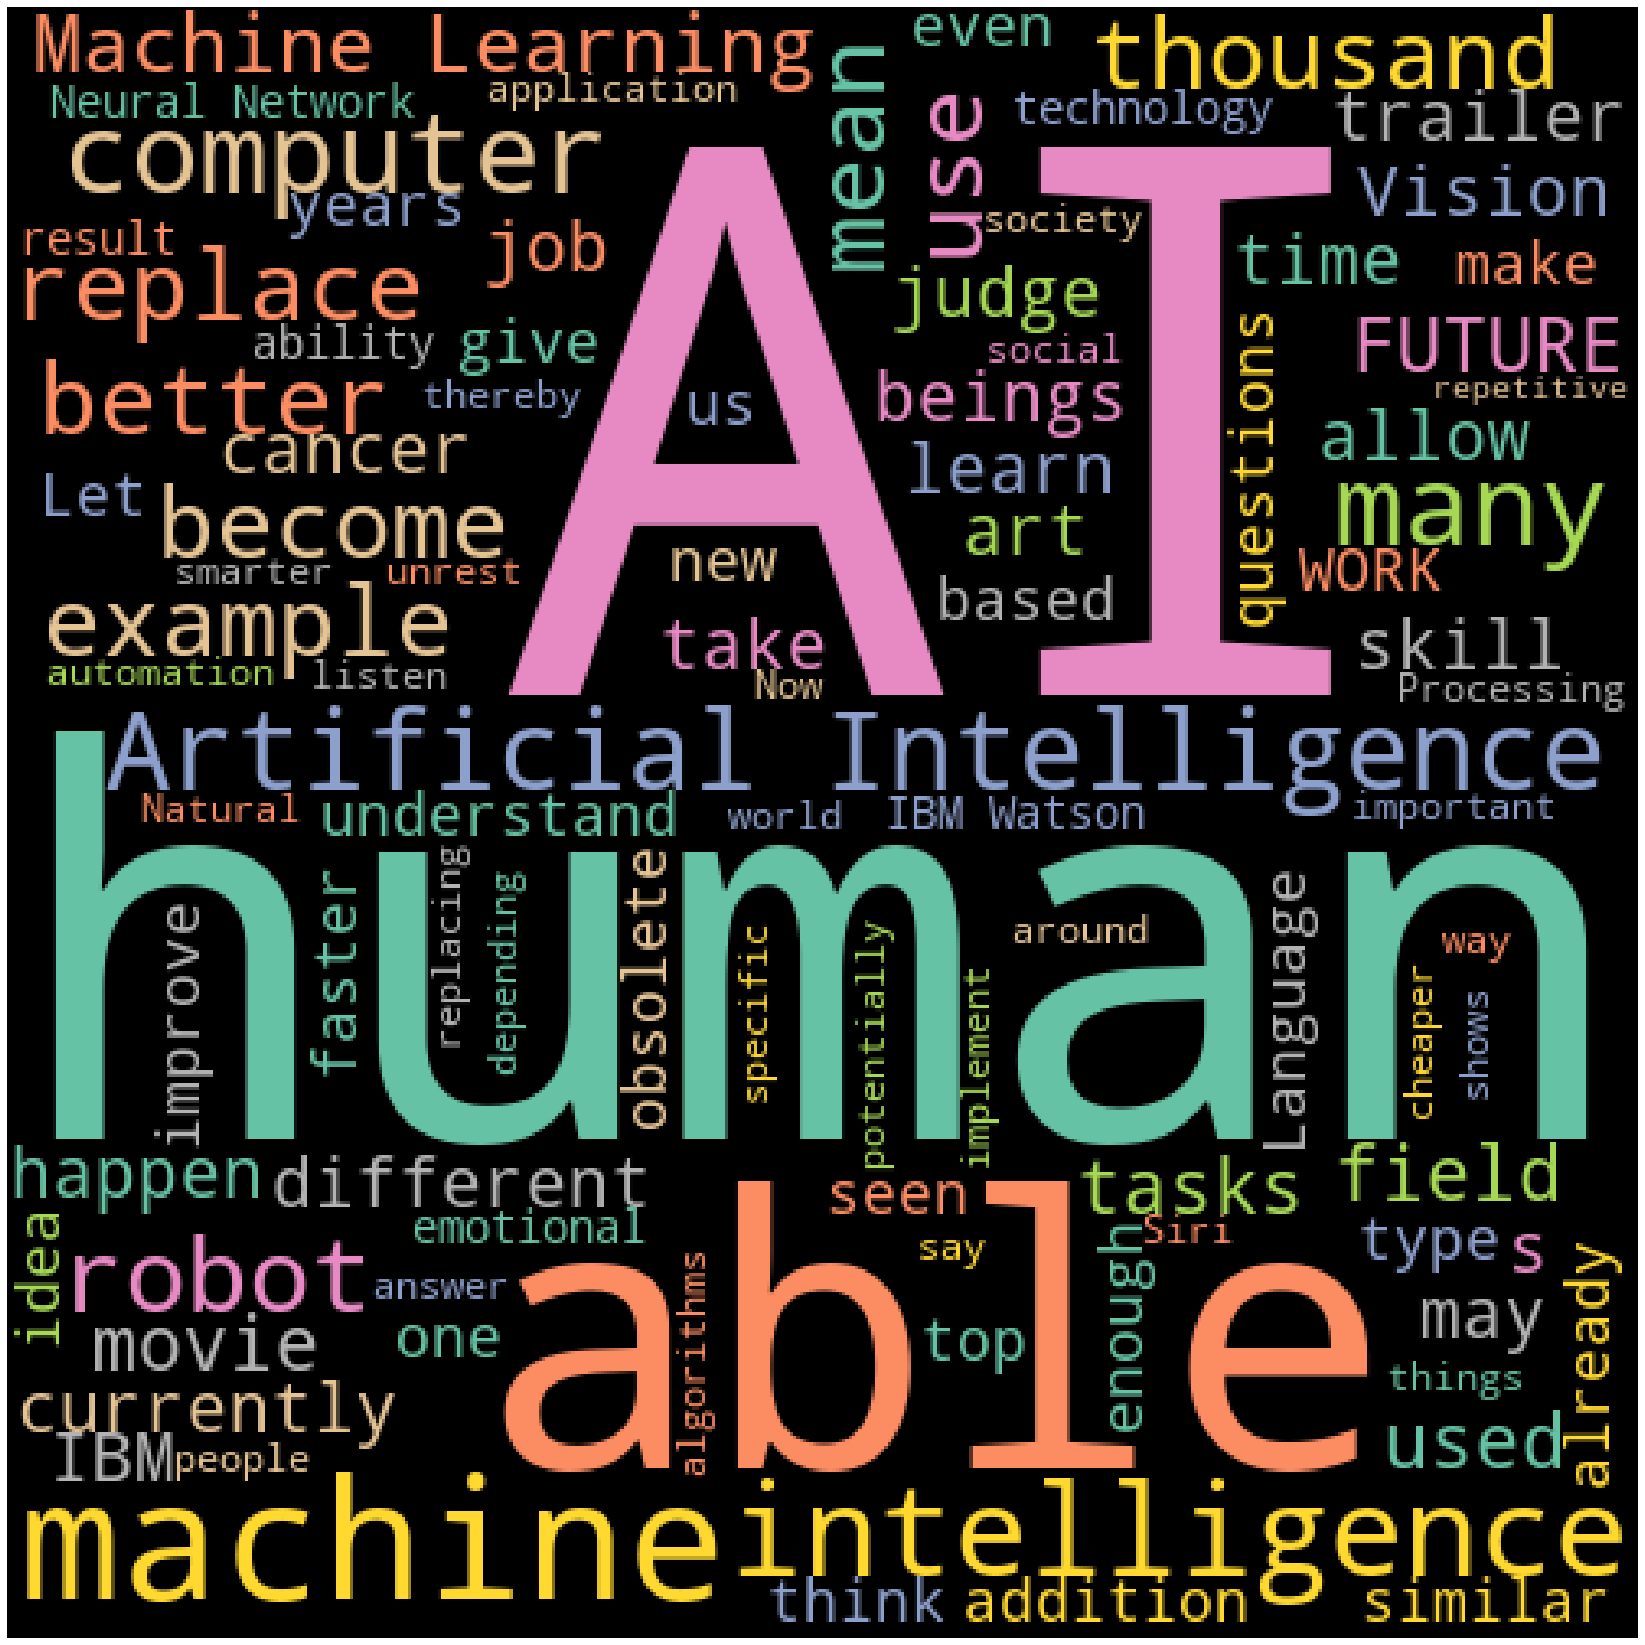

In [36]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 500, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(content)
# Plot
plot_cloud(wordcloud)

### positive word cloud

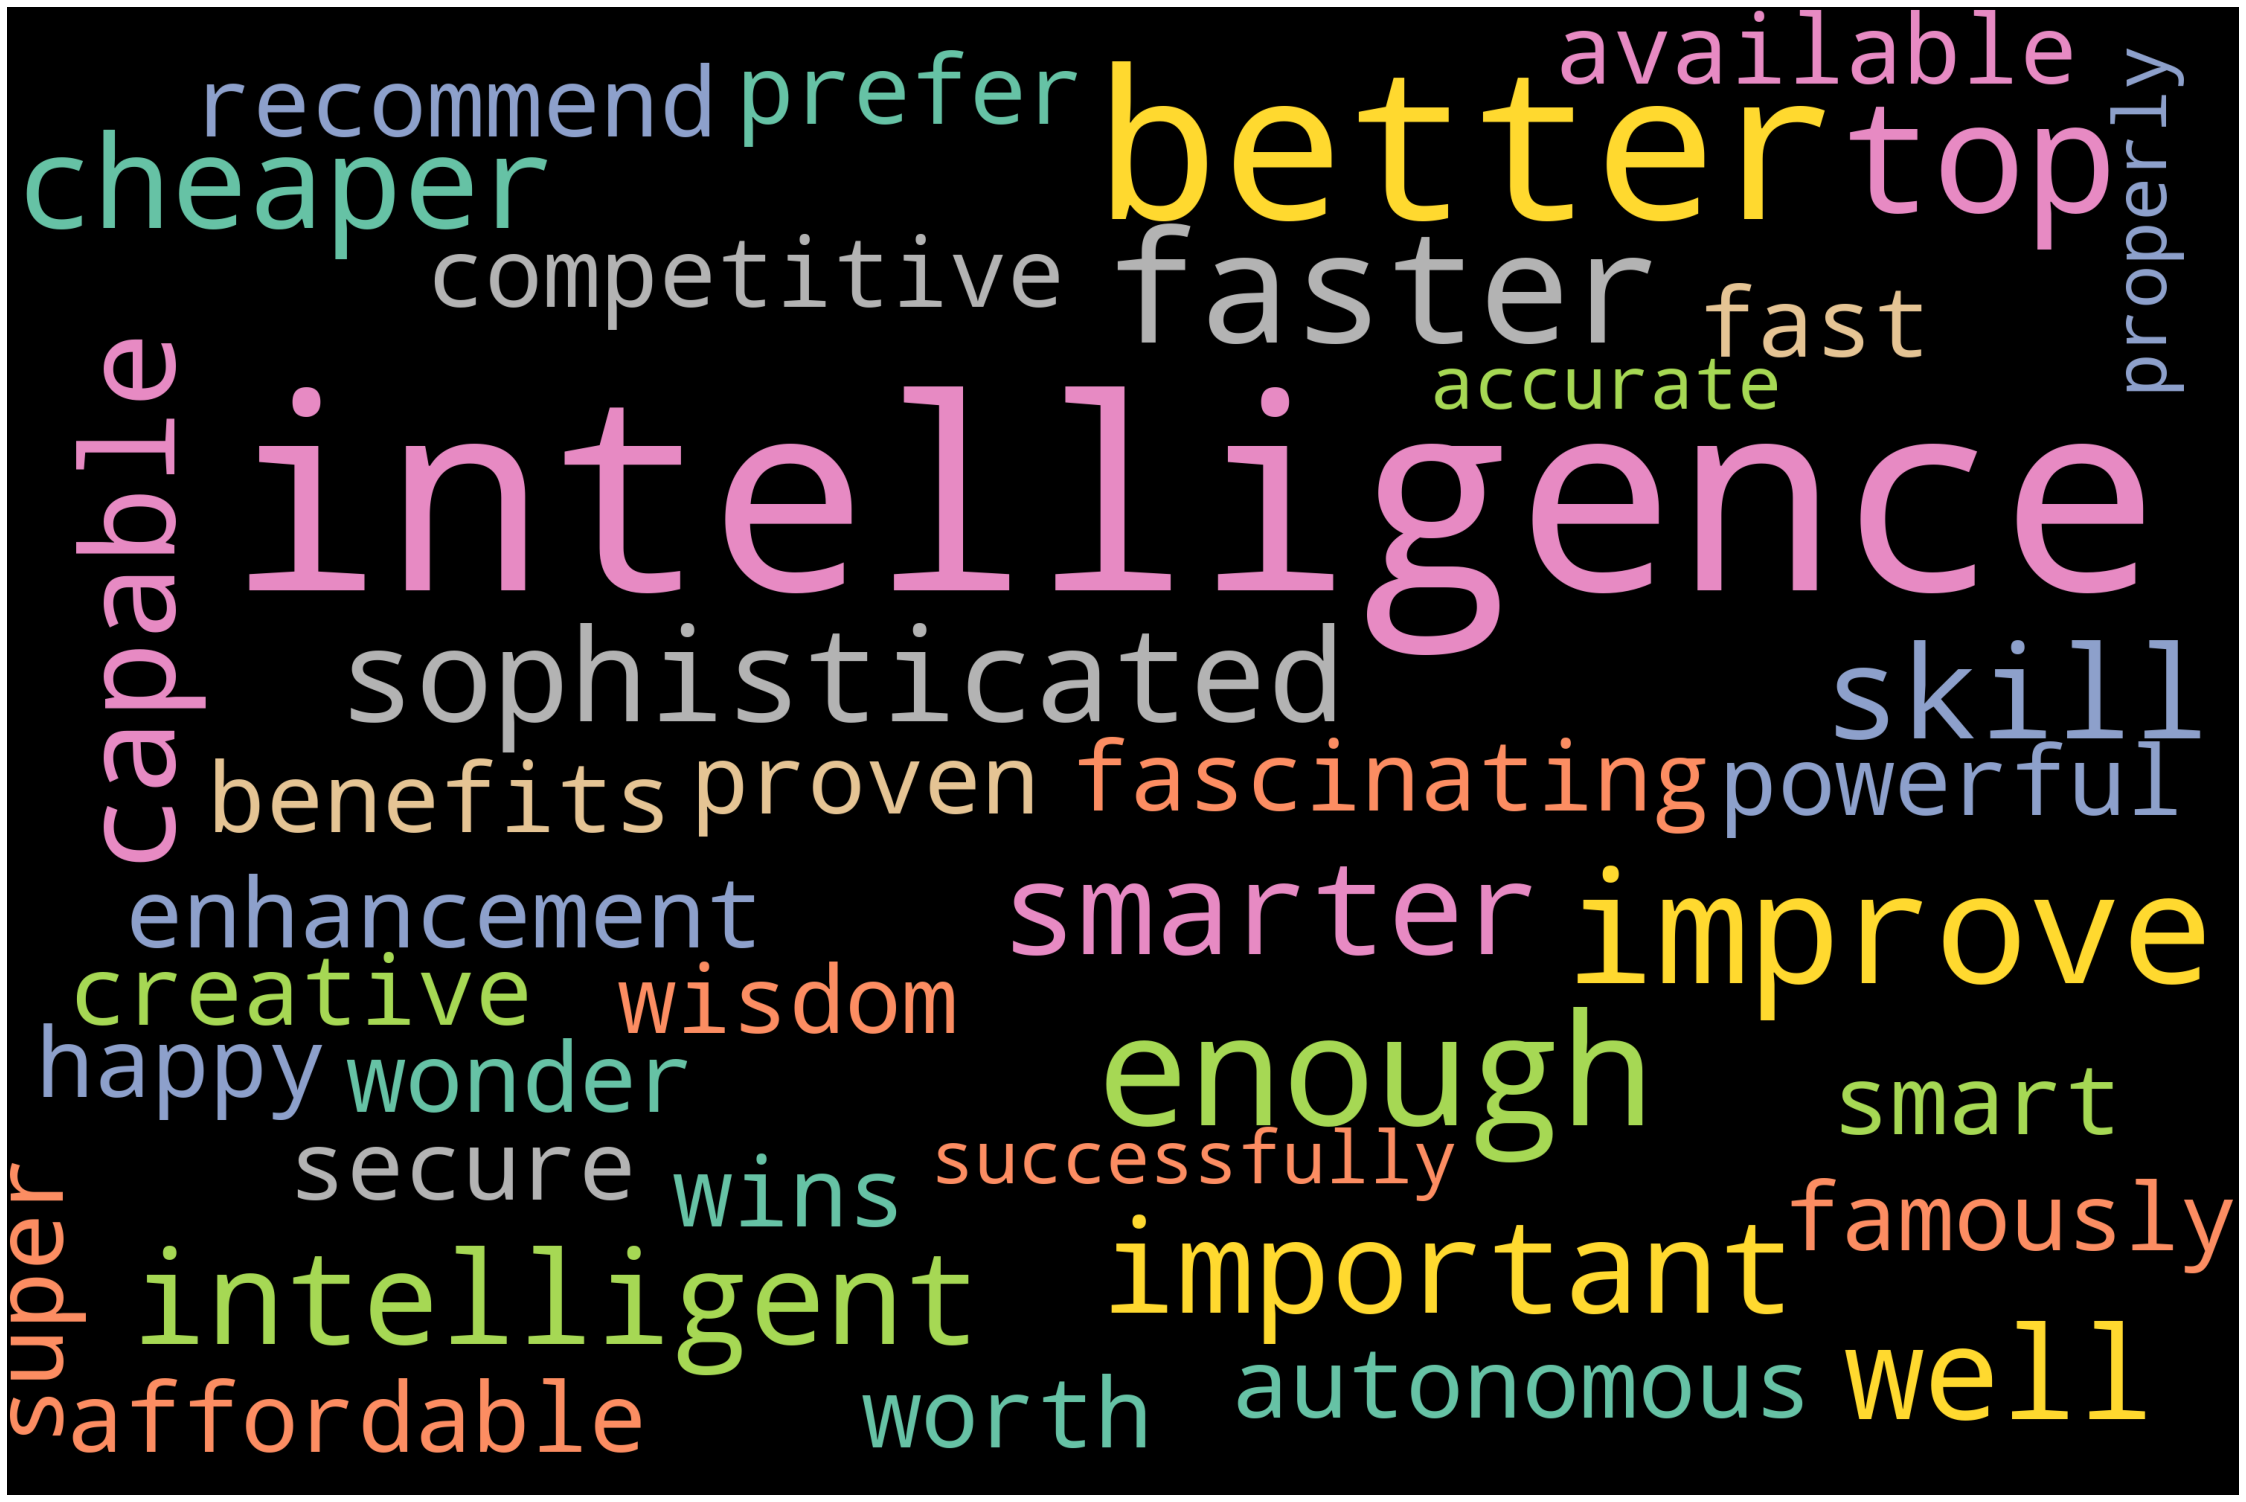

In [37]:
# Choosing the only words which are present in posword
pos_review = " ".join ([w for w in pos_count if w in poswords])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(pos_review)
#Plot
plot_cloud(wordcloud)

### negative word cloud

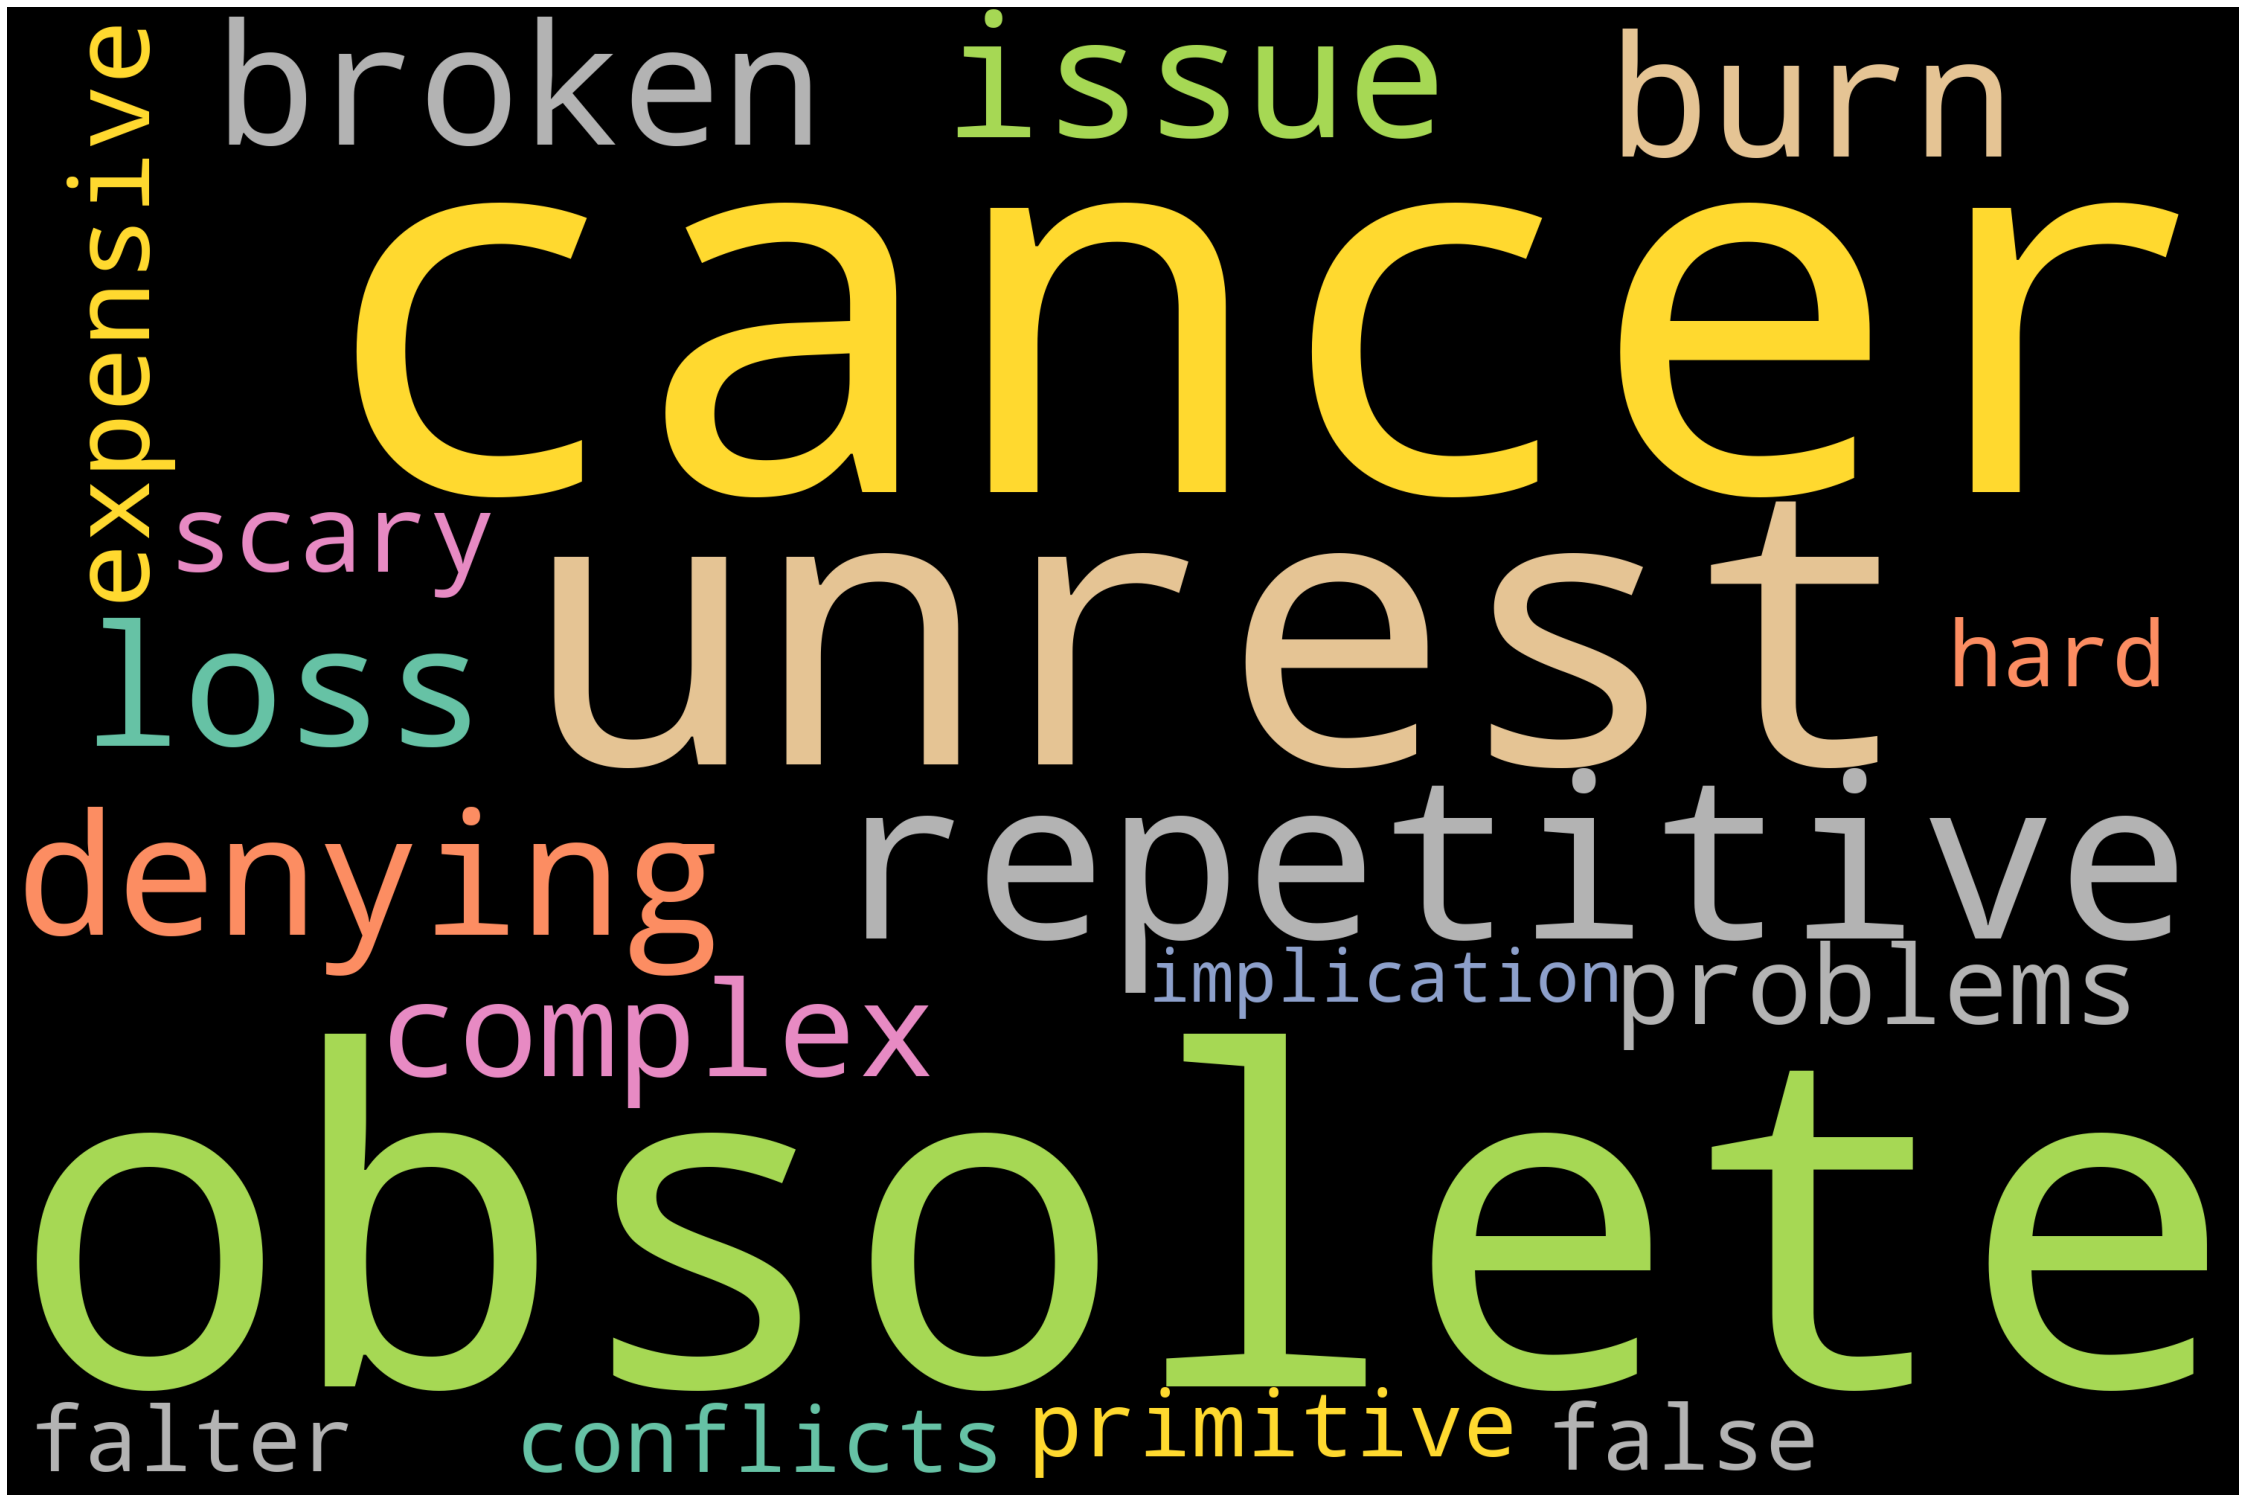

In [38]:
# Choosing the only words which are present in negwords
neg_review = " ".join ([w for w in neg_count if w in negwords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(neg_review)
#Plot
plot_cloud(wordcloud)